In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/top-football-leagues-scorers/Data.csv')

In [3]:
#Ngasih tau bentuk dari data frame kita
df.shape

(660, 15)

In [4]:
df.head(5)

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [5]:
#Menunjukkan kolom yang ada
df.columns

Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution ', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'],
      dtype='object')

In [6]:
#Menghilangkan kolom yang dimau dengan axis = 1 agar program tau kalau ini adalah kolom dan bukan baris
"""df = df[['Country', 'League', 'Club', 'Player Names', 'Matches_Played','Substitution ', 'Mins'
          'Goals','xG', 'xG Per Avg Match', 'Shots','OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match',
         'Year']].copy()"""

"df = df[['Country', 'League', 'Club', 'Player Names', 'Matches_Played','Substitution ', 'Mins'\n          'Goals','xG', 'xG Per Avg Match', 'Shots','OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match',\n         'Year']].copy()"

In [7]:
#Melihat apakah masing-masing kolom memiliki isi dan bukan null lalu menjumlahkan data yang tidak null
df.isna().sum()

Country                     0
League                      0
Club                       34
Player Names                0
Matches_Played              0
Substitution                0
Mins                        0
Goals                       0
xG                          0
xG Per Avg Match            0
Shots                       0
OnTarget                    0
Shots Per Avg Match         0
On Target Per Avg Match     0
Year                        0
dtype: int64

In [8]:
#Mengecek apakah ada data yang terduplikat atau tercopy 2 kali
df.loc[df.duplicated()]

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year


In [9]:
#apakah ada yang terduplikat di kolom subset player name
df.loc[df.duplicated(subset = ['Player Names'])]

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
101,Spain,La Liga,(BAR),Antoine Griezmann,30,2,2596,19,15.58,0.57,72,40,2.63,1.46,2017
102,Spain,La Liga,(CEL),Iago Aspas,33,1,3053,22,19.92,0.62,94,43,2.92,1.34,2017
105,Spain,La Liga,(ATL),Luis Suarez,32,1,3008,25,25.65,0.81,121,55,3.82,1.74,2017
107,Spain,La Liga,(BAR),Lionel Messi,32,4,3123,33,32.54,0.99,197,95,5.99,2.89,2017
112,Spain,La Liga,(JUV),Cristiano Ronaldo,27,0,2375,26,29.00,1.16,178,76,7.12,3.04,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Netherlands,Eredivisie,(FEY),Steven Berghuis,24,0,2226,15,13.36,0.57,89,44,3.80,1.88,2020
651,Netherlands,Eredivisie,(WIL),Vangelis Pavlidis,25,0,2265,11,12.64,0.53,70,31,2.94,1.30,2020
652,Netherlands,Eredivisie,(EMM),Michael de Leeuw,26,0,2383,9,8.28,0.33,51,23,2.03,0.92,2020
653,Netherlands,Eredivisie,(PSV),Donyell Malen,14,0,1245,11,8.91,0.68,59,32,4.50,2.44,2020


In [10]:
df = df.loc[~df.duplicated(subset = ['Player Names', 'League','Club'])].copy()

In [11]:
df.shape

(475, 15)

Text(0, 0.5, 'Jumlah Pemain')

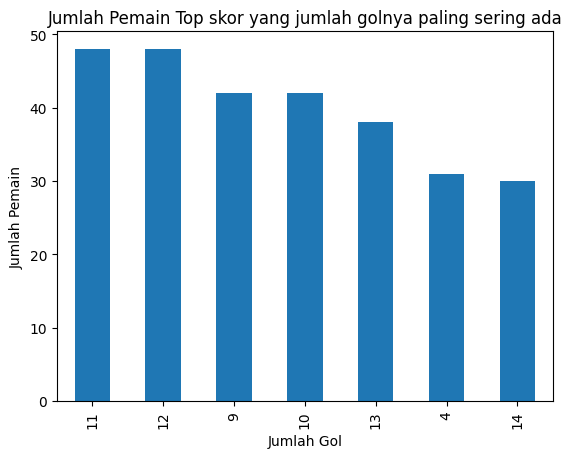

In [12]:
ax = df['Goals'].value_counts() \
.head(7)\
.plot(kind = 'bar',title = 'Jumlah Pemain Top skor yang jumlah golnya paling sering ada')
ax.set_xlabel('Jumlah Gol')
ax.set_ylabel('Jumlah Pemain')

Text(0.5, 0, 'Matched Played')

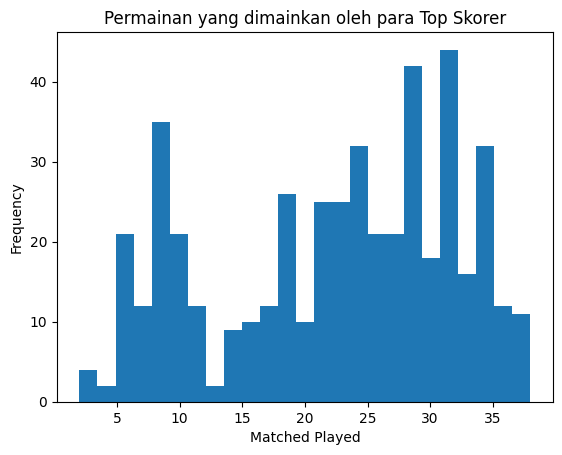

In [13]:
ax = df['Matches_Played'].plot(kind = 'hist',bins = 25, 
                               title = 'Permainan yang dimainkan oleh para Top Skorer')
ax.set_xlabel('Matched Played')

Text(0.5, 0, 'Matched Played')

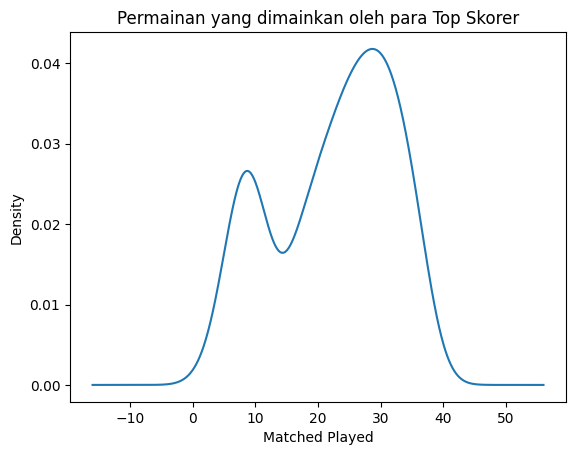

In [14]:
ax = df['Matches_Played'].plot(kind = 'kde', 
                               title = 'Permainan yang dimainkan oleh para Top Skorer')
ax.set_xlabel('Matched Played')

<function matplotlib.pyplot.show(close=None, block=None)>

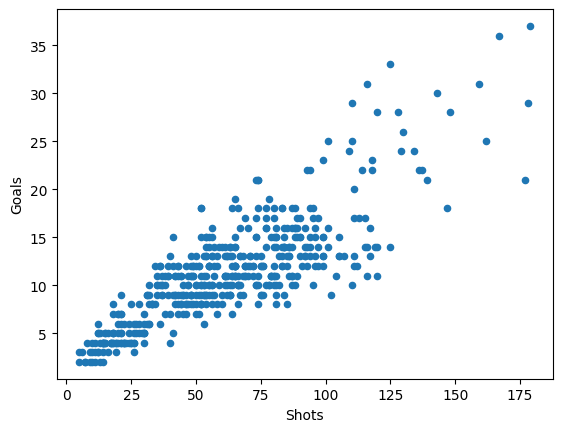

In [15]:
df.plot(kind = 'scatter',x = 'Shots',
       y='Goals')
plt.show

In [16]:
df.query('Goals')\
.groupby('Shots')['Goals']\
.agg(['mean','count'])\
.sort_values('mean')


,mean,count
Shots,,
32,10.000000,2
44,11.000000,23
64,11.000000,42
69,11.533333,30
76,12.000000,3
70,12.000000,2
43,12.000000,5
50,12.066667,45
99,12.083333,12
